## Overview

This homework asks you to visualize data from the Gapminder Foundation (https://www.gapminder.org). Download the full Gapminder dataset from the Open Numbers Github repository:
• https://github.com/open-numbers/ddf–gapminder–systema_globalis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Problem 1

Take the Gapminder Test: http://forms.gapminder.org/s3/test-2018.
What score did you receive? Did any of the answers surprise you?
Choose a question from the test, re-state it, and answer it using visualization and summarization. Provide a figure and any relevant output with your answer.

What score did you receive? - 23%

Did any of the answers surprise you? - Yes

Choose a question from the test, re-state it, and answer it using visualization and summarization. Provide a figure and any relevant output with your answer.

5. Where does the majority of the world population live?

In [2]:
def run_1():
    country_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv')
    total_population_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_total--by--geo--time.csv')
    df = total_population_df.merge(country_df[['country', 'income_groups']], left_on='geo', right_on='country')
    grouped_df = df[['income_groups', 'population_total']].groupby(['income_groups']).sum()
    grouped_df = grouped_df.reset_index()
    print(grouped_df)
    plt.bar(grouped_df['income_groups'], grouped_df['population_total'], align='center', alpha=0.5)
    plt.xticks(rotation='vertical')

         income_groups  population_total
0          high_income      249226583643
1           low_income      214102397309
2  lower_middle_income      485771893214
3  upper_middle_income      418248077494


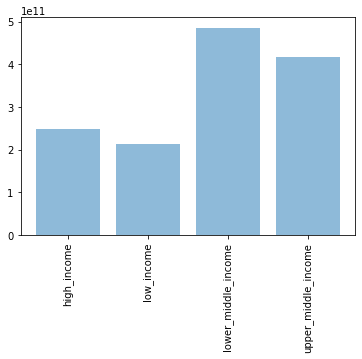

In [3]:
run_1()

As observed from the above plot, the majority of the population lives in middle income countries.

# Problem 2

Visualize the distribution of income (GDP / capita) across countries and continents, and how the distribution of income changes over time. Interpret the visualization and what you notice. Are they any notable trends and/or deviations from that trend? What caveats apply to your conclusions?

In [4]:
def gdp_for_continents(gdp_continent_df):
    grouped_df = gdp_continent_df[['time', 'world_4region', 'income_per_person_gdppercapita_ppp_inflation_adjusted']].groupby(['world_4region', 'time']).mean().reset_index()
    fig, ax = plt.subplots(figsize=(25,10))
    ax.title.set_text("GDP for continents")
    sns.lineplot(x="time", y="income_per_person_gdppercapita_ppp_inflation_adjusted", hue='world_4region', data=grouped_df, ax=ax)
    plt.legend(ncol=1, loc='upper left')    
    plt.show()

In [5]:
def gdp_for_countries(gdp_continent_df):
    continents = gdp_continent_df['world_4region'].unique()
    for i in range(len(continents)):
        df = gdp_continent_df[gdp_continent_df['world_4region'] == continents[i]]
        fig, ax = plt.subplots(figsize=(25,10))
        ax.title.set_text(continents[i])
        sns.lineplot(x="time", y="income_per_person_gdppercapita_ppp_inflation_adjusted", hue="country", data=df, ax=ax)
        plt.legend(ncol=2, loc='upper left')    
        plt.show()

In [6]:
def run_2():
    country_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv')
    gdp_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
    gdp_continent_df = pd.merge(gdp_df, country_df[['country', 'world_4region']], left_on = 'geo', right_on='country')
    gdp_for_continents(gdp_continent_df)
    gdp_for_countries(gdp_continent_df)


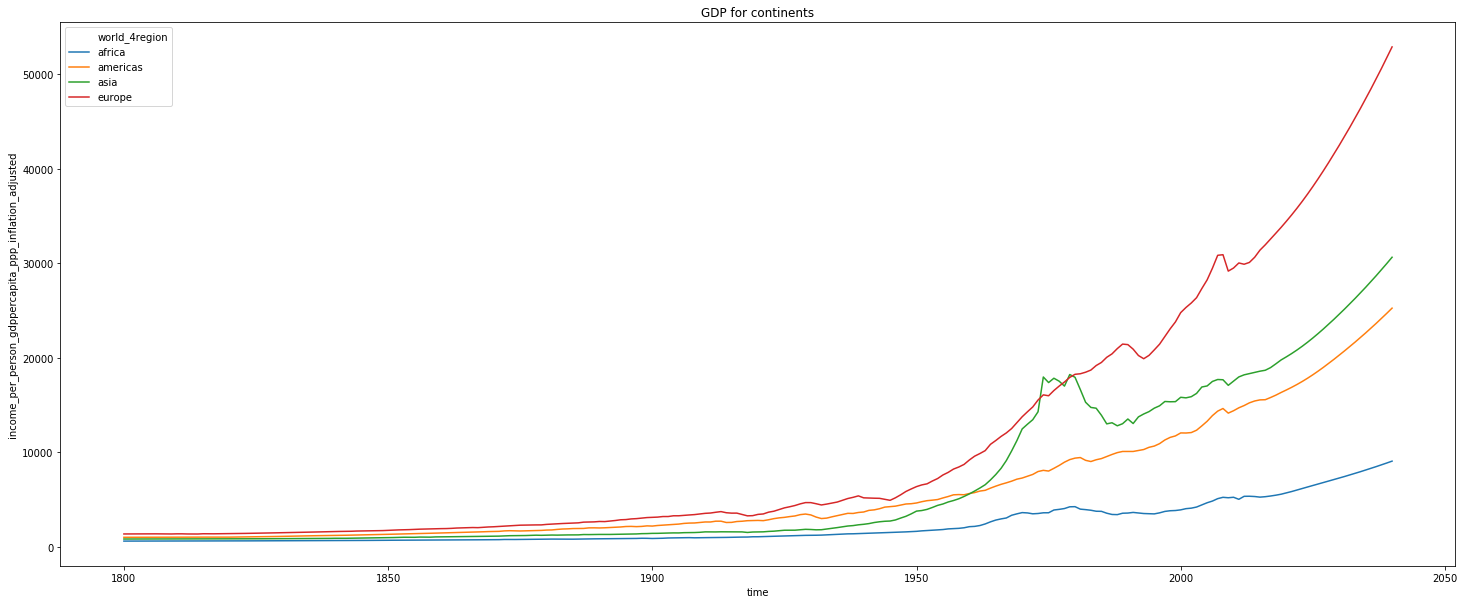

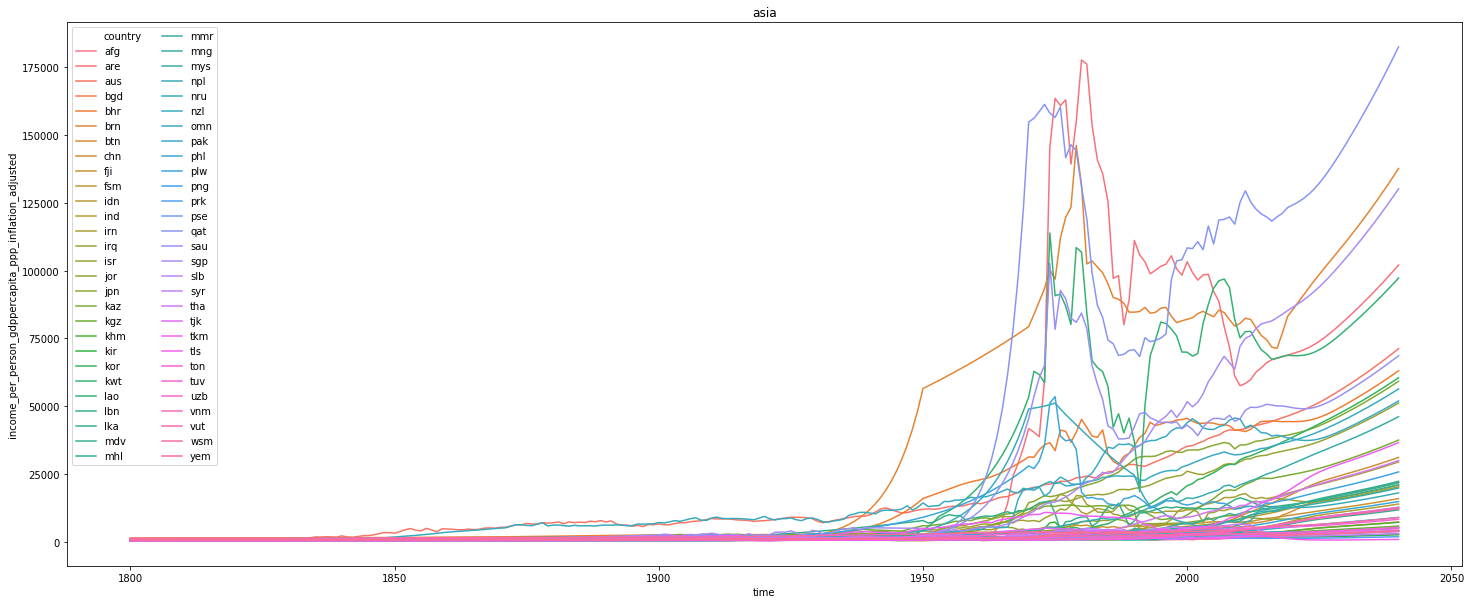

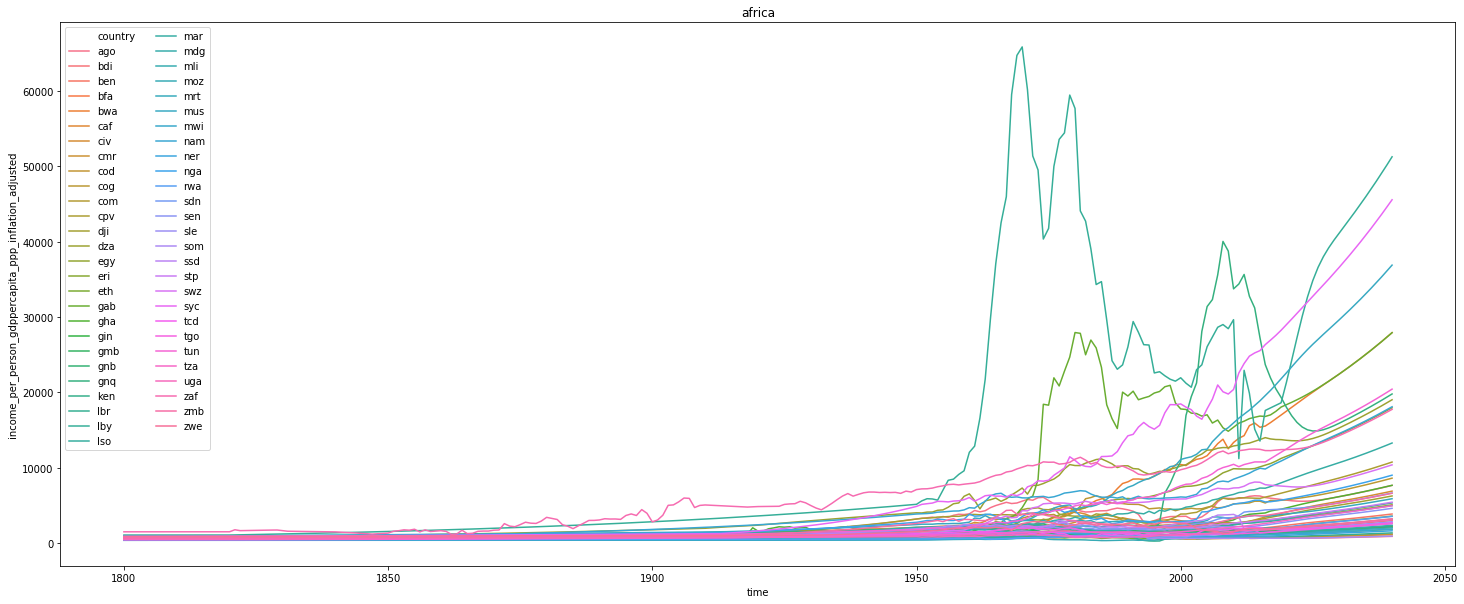

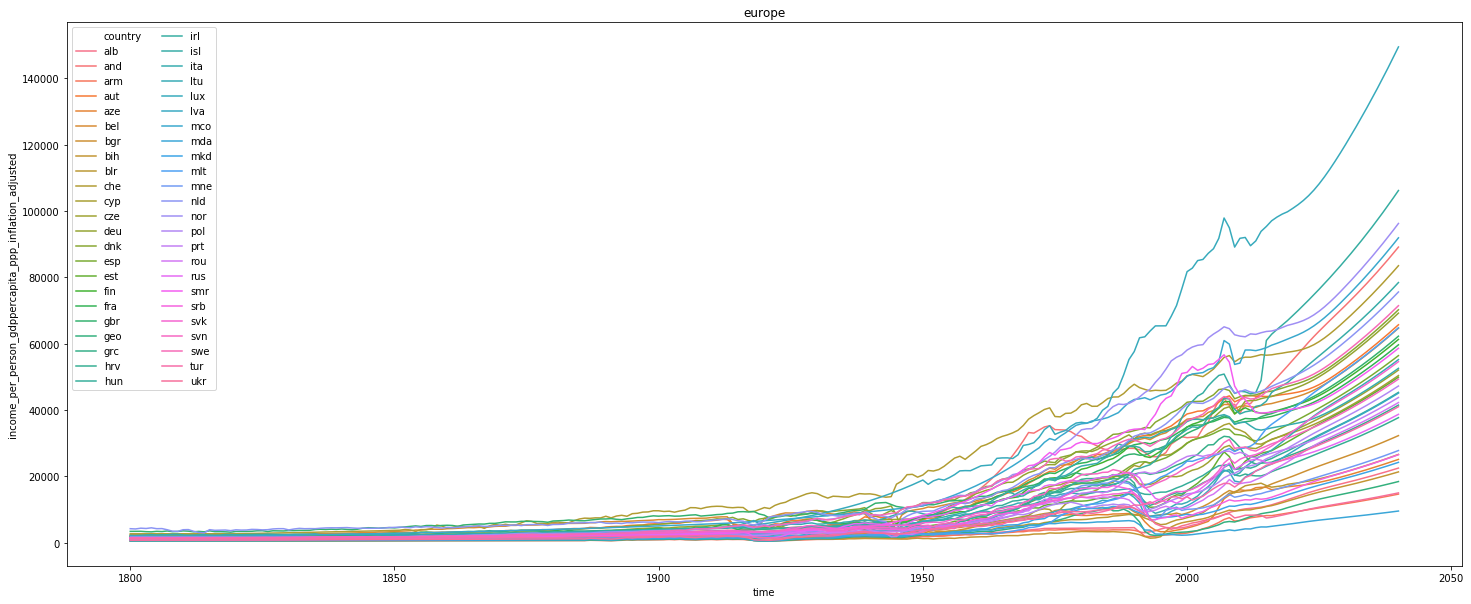

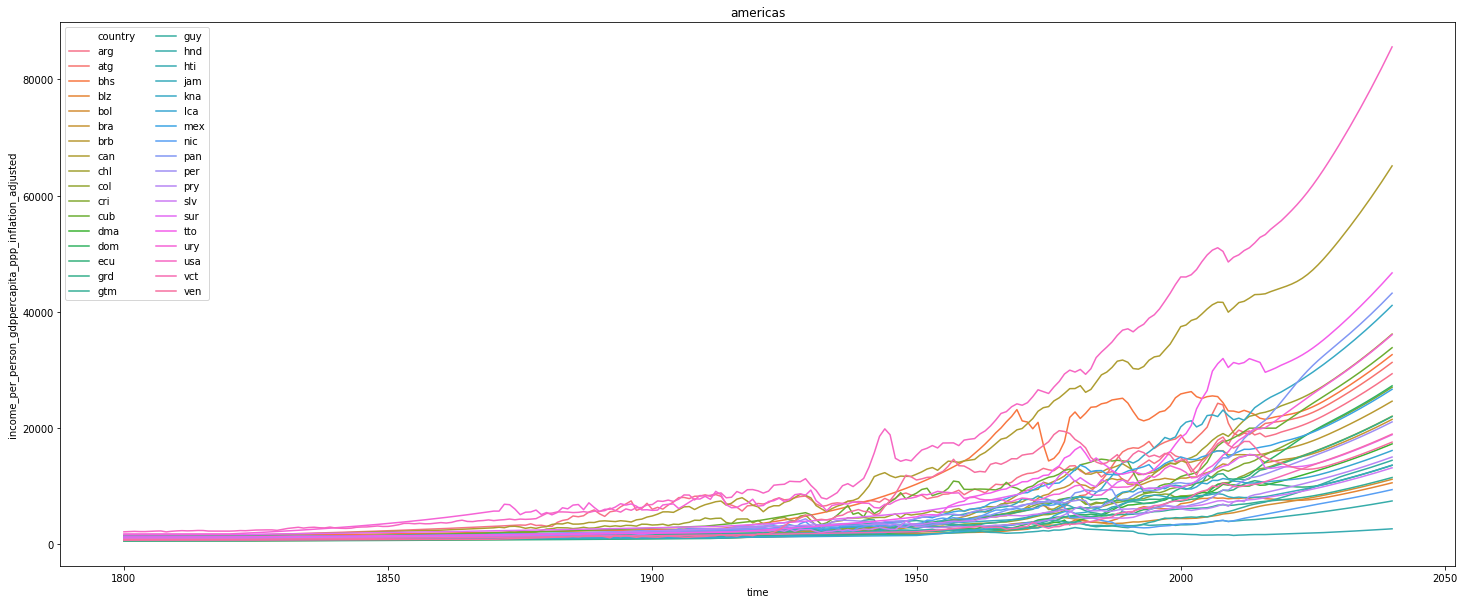

In [7]:
run_2()

Around 1960, The gdp of asia has gone above that of the americas. The gdp of asia has also gone above that of europe on few occasions. 

The gdp of all countries in europe and america seem to have steadily increased where as is asia nad africe, there seems to have a peak around 1970-1980's.

## Problem 3

Use visualization to investigate the relationship between income (GDP / capita), life expectancy, and child mortality over time. How does each measure change over time within each continent? Interpret your visualizations, noting any trends and/or outliers.

In [11]:
def run_3():
    country_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv')
    gdp_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
    child_mortality_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')
    life_expectancy_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

    result_df = pd.merge(gdp_df, country_df[['country', 'world_4region']], left_on = 'geo', right_on='country')
    result_df = pd.merge(result_df, child_mortality_df, on = ['geo', 'time'])
    result_df = pd.merge(result_df, life_expectancy_df, on = ['geo', 'time'])
    result_df.rename(columns={'child_mortality_0_5_year_olds_dying_per_1000_born':'child_mortality',
                               'life_expectancy_years':'life_expectancy',
                               'income_per_person_gdppercapita_ppp_inflation_adjusted':'gdp_per_capita'}, 
                     inplace=True)

    # Correlation over time between income (GDP / capita), life expectancy, and child mortality
    grouped_time_df = result_df[['time', 'child_mortality', 'life_expectancy', 'gdp_per_capita']].groupby(['time']).mean().reset_index()
    sns.pairplot(grouped_time_df[['child_mortality', 'life_expectancy', 'gdp_per_capita']])
    plt.suptitle('Correlation over time')
    fig, ax = plt.subplots(ncols=3, figsize=(25,10))
    sns.lineplot(x="time", y='child_mortality', data=grouped_time_df, ax=ax[0])
    sns.lineplot(x="time", y='life_expectancy', data=grouped_time_df, ax=ax[1])
    sns.lineplot(x="time", y='gdp_per_capita', data=grouped_time_df, ax=ax[2])
    plt.show()
        
    grouped_continent_time_df = result_df.groupby(['world_4region', 'time']).mean().reset_index()

    # Correlation over time between income (GDP / capita), life expectancy, and child mortality for each continent
    continents = grouped_continent_time_df['world_4region'].unique()
    for i in range(len(continents)):
        df = grouped_continent_time_df[grouped_continent_time_df['world_4region'] == continents[i]]        
        sns.pairplot(df[['child_mortality', 'life_expectancy', 'gdp_per_capita']])
        plt.suptitle('Correlation over time: {}'.format(continents[i]))
                
    fig, ax = plt.subplots(ncols=3, figsize=(25,10))
    sns.lineplot(x="time", y='child_mortality', hue='world_4region', data=grouped_continent_time_df, ax=ax[0])
    sns.lineplot(x="time", y='life_expectancy', hue='world_4region', data=grouped_continent_time_df, ax=ax[1])
    sns.lineplot(x="time", y='gdp_per_capita', hue='world_4region', data=grouped_continent_time_df, ax=ax[2])
    plt.show()


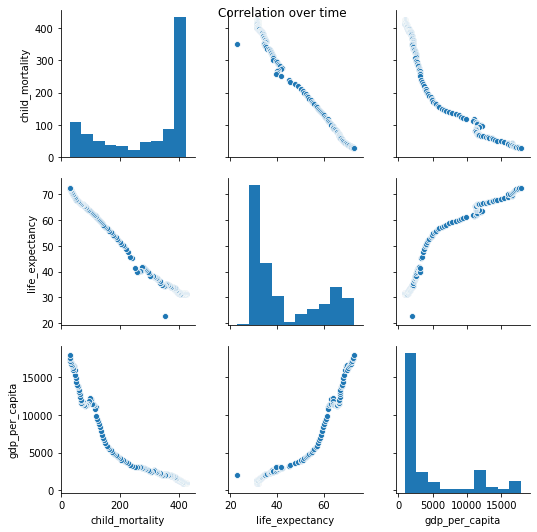

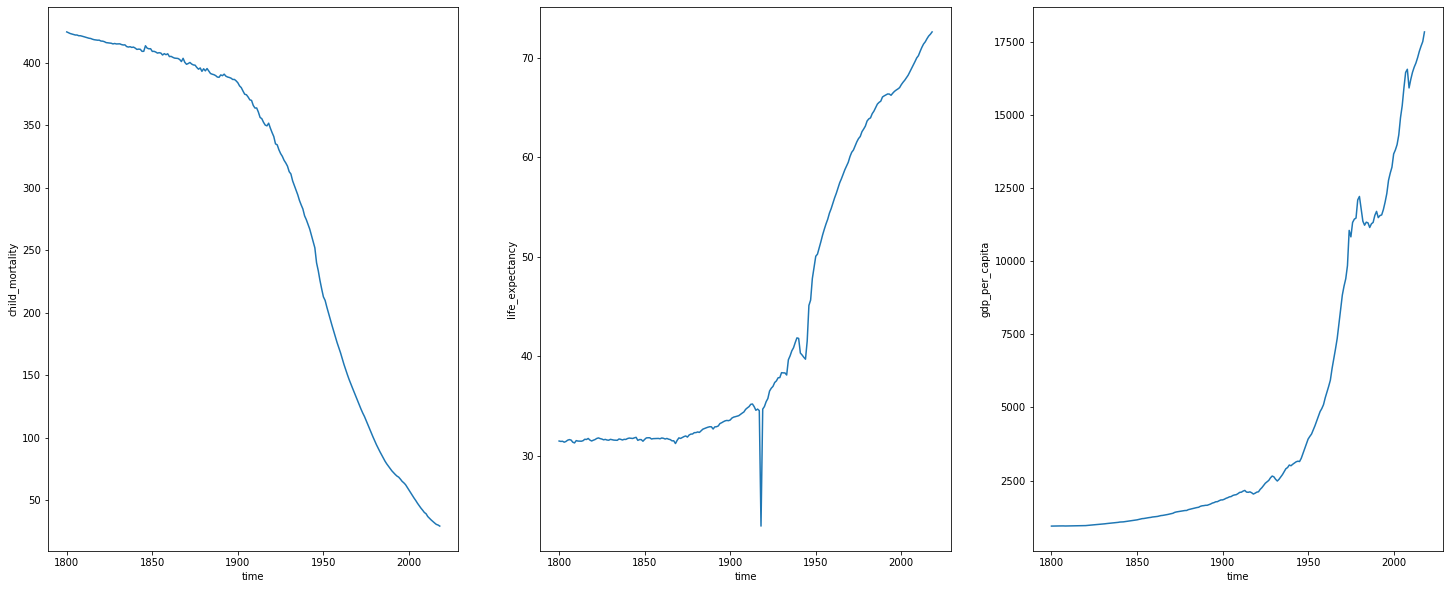

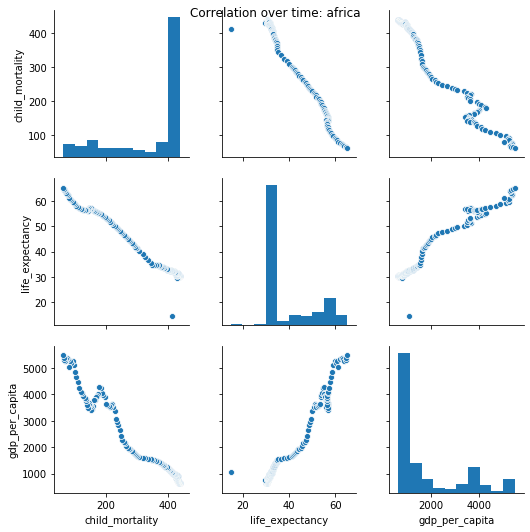

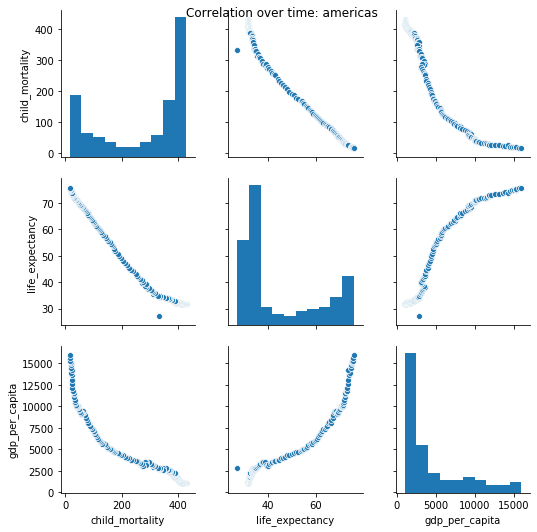

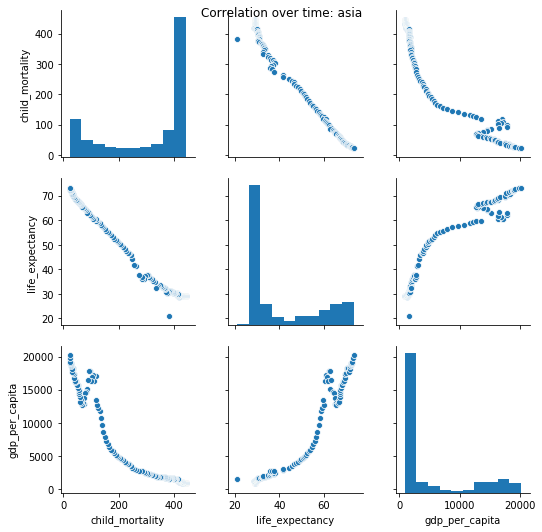

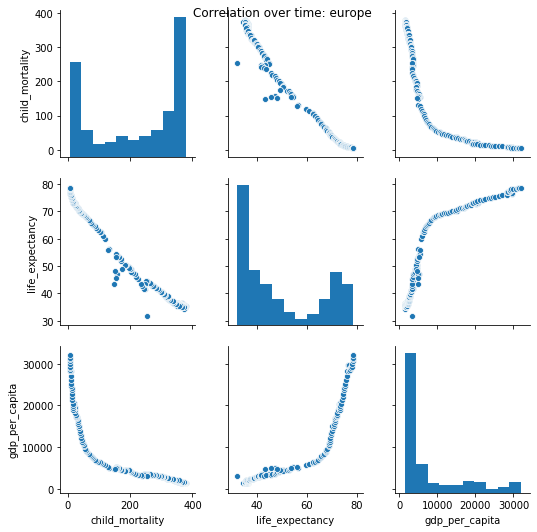

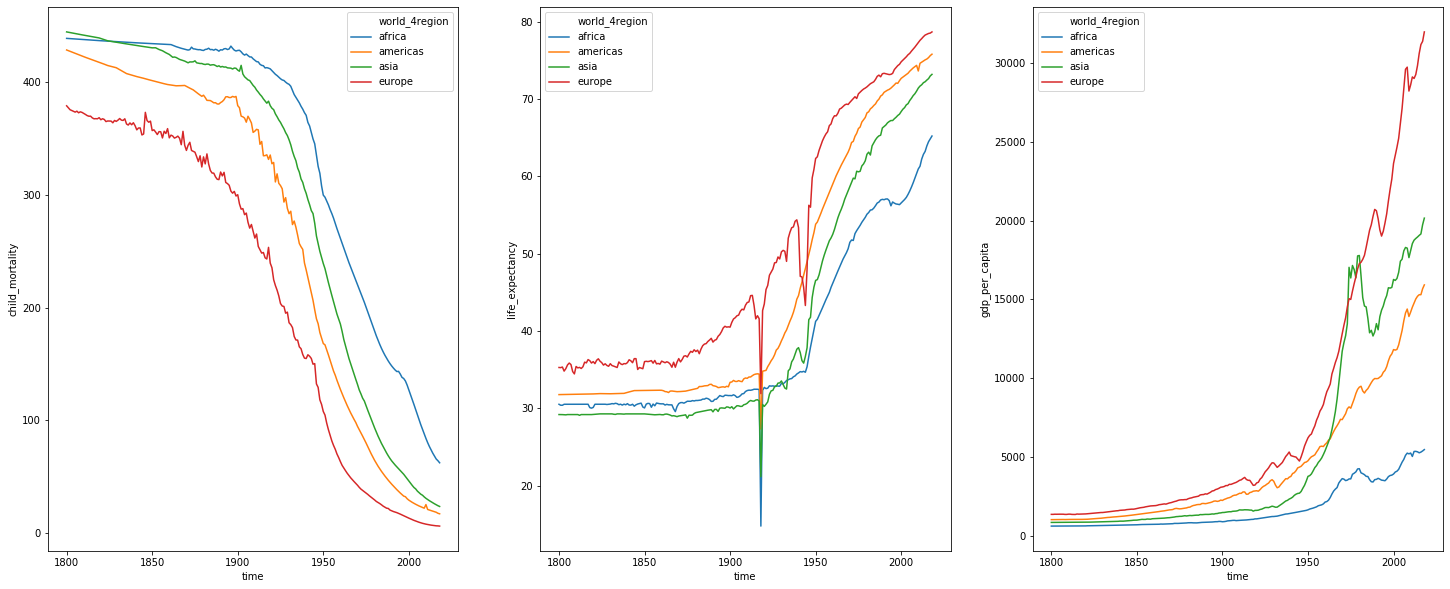

In [12]:
run_3()

Over the years, the child mortality has gone down where as the income and the life expectancy has gone up. However around the 1920's time frame, we can observe a sudden dip in the life expectancy.

In terms of correlation, child mortality seems to have score of -0.9 with both life expectancy and income, whereas life expectancy and income seems to be strongly positively correlated with each other.

## Problem 4
Choose two variables you have not investigated yet, and visualize their distributions, their relationship with each other, and how these change over time. Interpret your visualizations, noting any trends and/or outliers

Variables Chosen - long_term_unemployment_rate, male_long_term_unemployment_rate, female_long_term_unemployment_rate

In [13]:
def run_4():
    male_unemployed_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--male_long_term_unemployment_rate_percent--by--geo--time.csv') 
    female_unemployed_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--female_long_term_unemployment_rate_percent--by--geo--time.csv')
    country_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv')
    unemployed_df = pd.read_csv('../input/ddf--gapminder--systema_globalis-master/ddf--datapoints--long_term_unemployment_rate_percent--by--geo--time.csv') 

    result_df = pd.merge(male_unemployed_df, female_unemployed_df, on = ['geo', 'time'])
    result_df = pd.merge(result_df, unemployed_df, on = ['geo', 'time'])
    result_df = pd.merge(result_df, country_df[['country', 'world_4region', 'income_groups']], left_on = 'geo', right_on='country')
    result_df.rename(columns={'male_long_term_unemployment_rate_percent':'male_unemployment_rate',
                              'long_term_unemployment_rate_percent':'unemployment_rate',
                               'female_long_term_unemployment_rate_percent':'female_unemployment_rate'}, 
                     inplace=True)

    grouped_income_groups_time_df = result_df[['time', 'male_unemployment_rate', 'female_unemployment_rate', 'unemployment_rate']].groupby(['time']).mean().reset_index()
    fig, ax = plt.subplots(ncols=3, figsize=(25,10))
    sns.lineplot(x="time", y='male_unemployment_rate', data=grouped_income_groups_time_df, ax=ax[0])
    ax[0].set_ylim([0,3])
    sns.lineplot(x="time", y='female_unemployment_rate', data=grouped_income_groups_time_df, ax=ax[1])
    ax[1].set_ylim([0,3])
    sns.lineplot(x="time", y='unemployment_rate', data=grouped_income_groups_time_df, ax=ax[2])
    ax[2].set_ylim([0,3])
    plt.show()
    

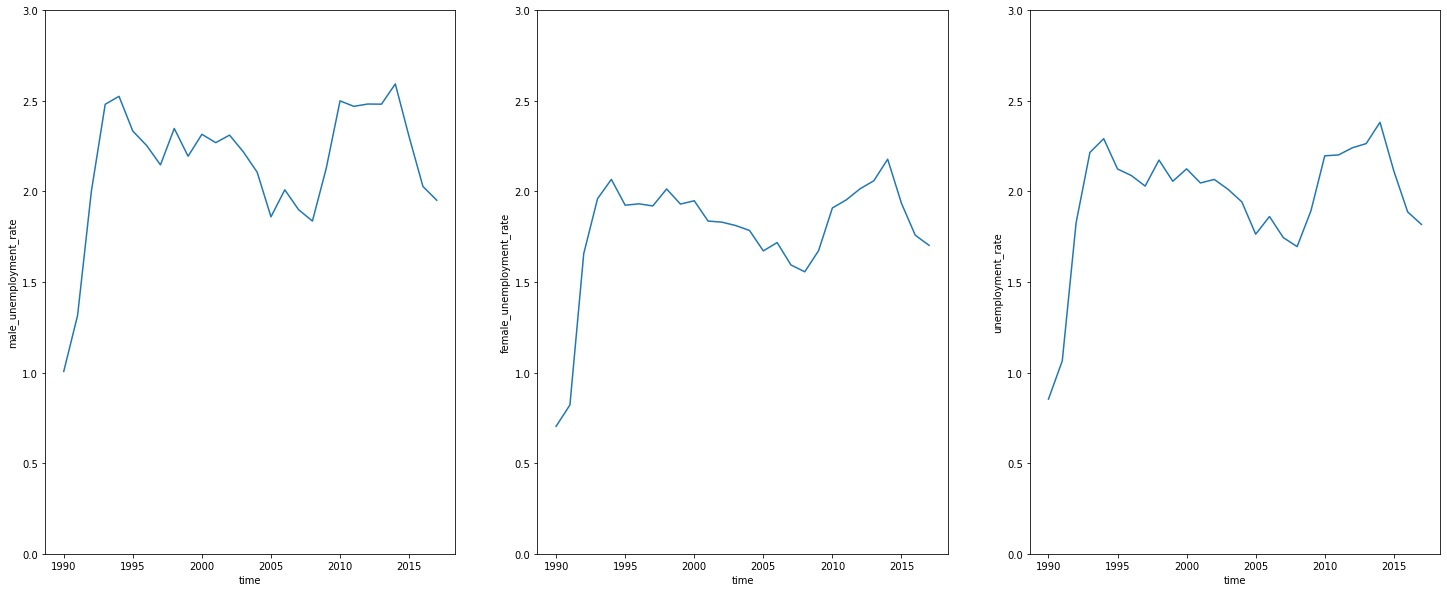

In [14]:
run_4()

The unemployeent rate has increased over time compared to the initial years, however last few years the curve is on the downward path. Similar charactertistics are observed when you see in particular for male and female.

## Problem 5

Did you use static or interactive plots to answer the previous problems?

Explore the data using the interactive visualization tools at https://www.gapminder.org/tools, and watch the TED talk “The best stats you’ve ever seen” at https://www.youtube.com/watch?v=hVimVzgtD6w.

Discuss the advantages, disadvantages, and relative usefulness of using interactive/dynamic visualizations
versus static visualizations.

I used static plots to answer the above questions.

Dynamic visualizations tend to keep the user more engaging and also a great tool for data exploration. It also enables to convey more information with a single dynamic plot.

However, dynamic visualizations relatively takes more time to code up compared to static ones. With new libraries like plotly, python has enabled python programmers to easily create a dynamic visualization and close the gap.